# Import Libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix, f1_score,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings("ignore")



In [2]:
# Load Dataset

data= pd.read_csv(r'F:\IT Learning\MY PROJECTS\Data Science And ML Projects\Breast Cancer Wisconsin (Diagnostic)\data.csv')

In [3]:
# Print TOP 5 Rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Print BOT 5 Rows

data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
# Shape of Data (Rows,Columns)

data.shape

(569, 33)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
# Label_Encoding For convert Target Feature in numeriacl or Bianry from (0 & 1)

encoder= LabelEncoder()
data['diagnosis']= encoder.fit_transform(data['diagnosis'])

**Feature Selection:**

In [10]:
# Main dataset correlation matrix

correlation_matrix= data.corr()

***Filter_Method:***

**Correlation Matrix Method:**

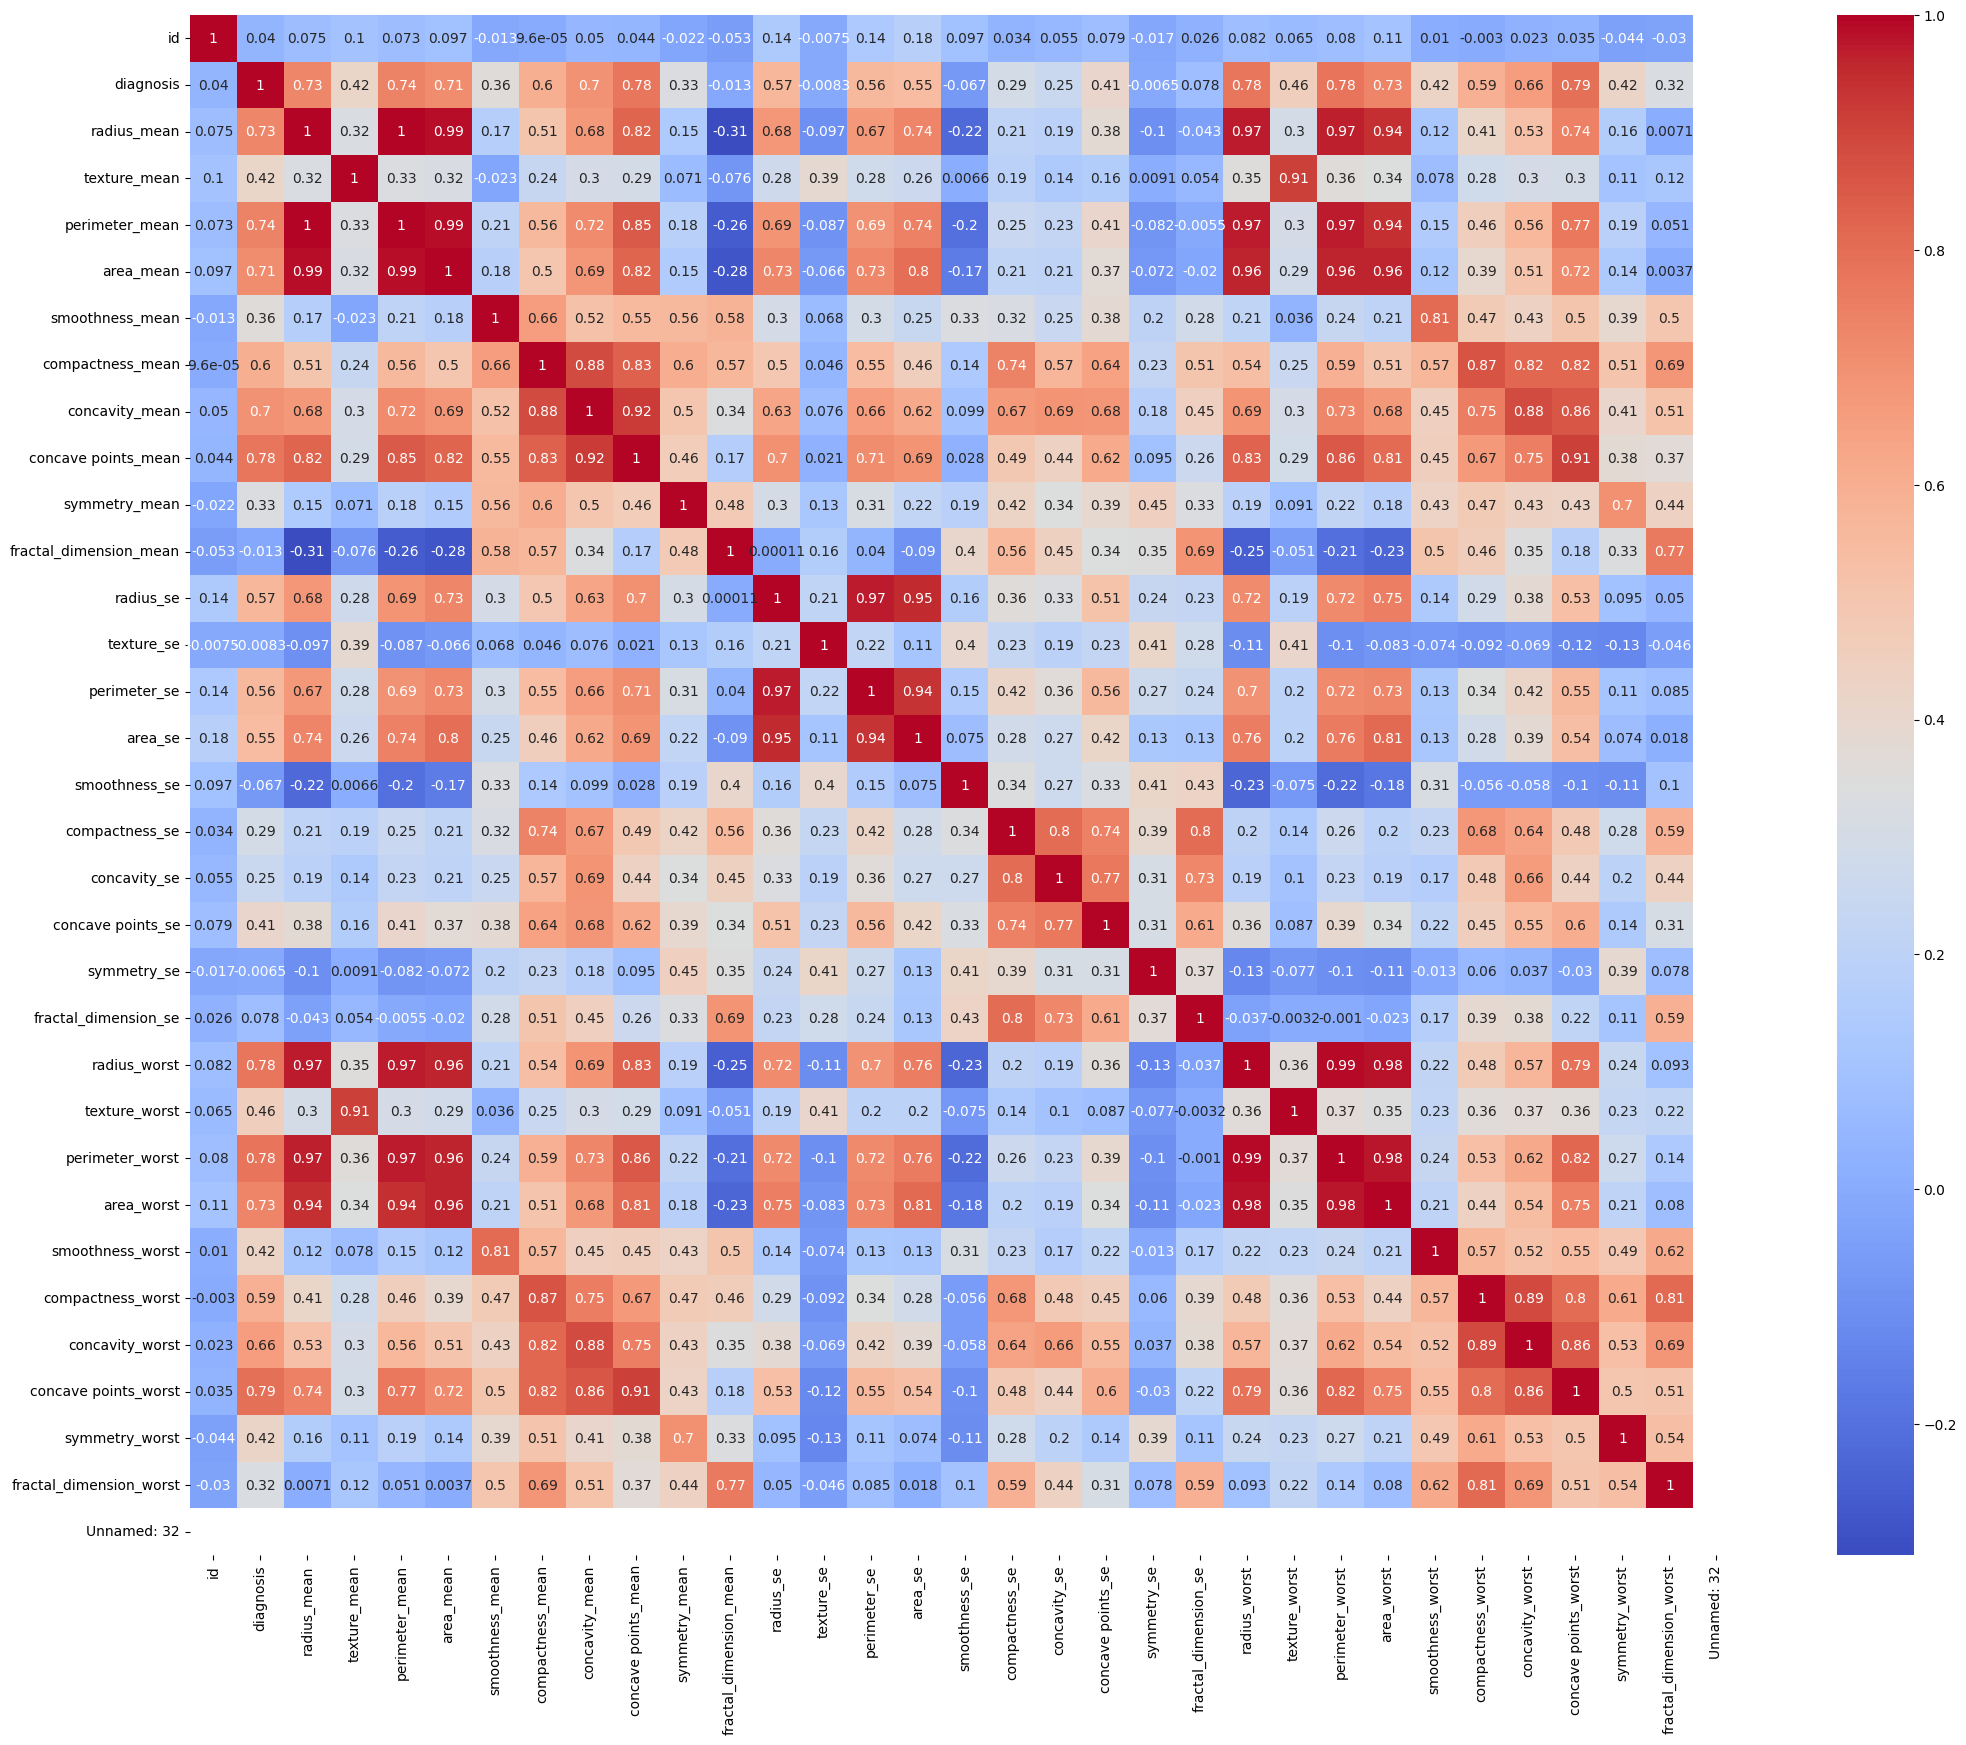

In [11]:
plt.figure(figsize= (25,20))
sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm')
plt.show()

# Fetch High Correlated Features With Target Feature:

In [12]:
diagnosis_corr= correlation_matrix['diagnosis']


In [13]:
correlation_matrix = data.corr()

# Specify your correlation threshold
correlation_threshold = 0.5

# Select features highly correlated with 'diagnosis'
selected_features = correlation_matrix[
    (correlation_matrix['diagnosis'] > correlation_threshold) &
    (correlation_matrix.index != 'diagnosis')
]

print("Selected features:")
print(selected_features)


Selected features:
                            id  diagnosis  radius_mean  texture_mean  \
radius_mean           0.074626   0.730029     1.000000      0.323782   
perimeter_mean        0.073159   0.742636     0.997855      0.329533   
area_mean             0.096893   0.708984     0.987357      0.321086   
compactness_mean      0.000096   0.596534     0.506124      0.236702   
concavity_mean        0.050080   0.696360     0.676764      0.302418   
concave points_mean   0.044158   0.776614     0.822529      0.293464   
radius_se             0.143048   0.567134     0.679090      0.275869   
perimeter_se          0.137331   0.556141     0.674172      0.281673   
area_se               0.177742   0.548236     0.735864      0.259845   
radius_worst          0.082405   0.776454     0.969539      0.352573   
perimeter_worst       0.079986   0.782914     0.965137      0.358040   
area_worst            0.107187   0.733825     0.941082      0.343546   
compactness_worst    -0.002968   0.590998    

In [14]:
# Create X and y for Model Trainig Data
selected_feature_names= selected_features.index.to_list()
X= data[selected_feature_names]
y= data['diagnosis']

<AxesSubplot: >

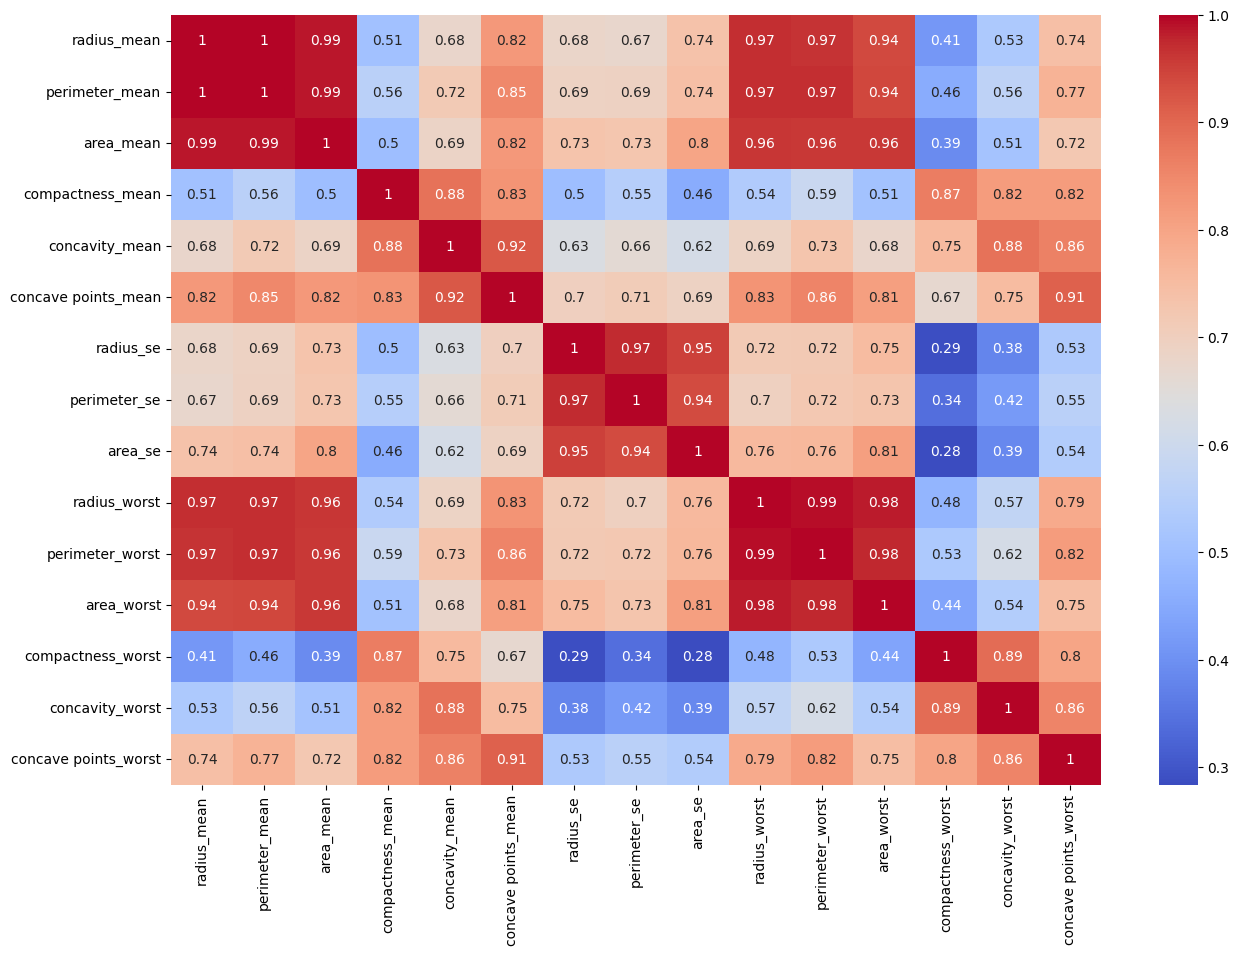

In [15]:
plt.figure(figsize= (15,10))
sns.heatmap(X.corr(),annot= True, cmap= plt.cm.coolwarm)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(455, 15)
(114, 15)
(455,)
(114,)


In [18]:
model=  LogisticRegression(max_iter=1000,C=10)

In [19]:
model.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=1000)

In [20]:
model.score(X_test,y_test)

0.9912280701754386

In [21]:
model.score(X_train,y_train)

0.9472527472527472

# Fetch Highly Correlated Features with each other and train model:

In [22]:
highly_correlated_features= set() # why in set ?
correlation_threshold= 0.7  # why 0.7?

for i in range (len(correlation_matrix.columns)):
    for j in range (i):
        if correlation_matrix.iloc[i,j] > correlation_threshold:
            highly_correlated_features.add(correlation_matrix.columns[i])
            highly_correlated_features.add(correlation_matrix.columns[j])
            


In [23]:
highly_correlated_features

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_mean',
 'compactness_se',
 'compactness_worst',
 'concave points_mean',
 'concave points_se',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'diagnosis',
 'fractal_dimension_mean',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_mean',
 'radius_se',
 'radius_worst',
 'smoothness_mean',
 'smoothness_worst',
 'texture_mean',
 'texture_worst'}

In [24]:
highly_correlated_features=list(highly_correlated_features) #Set to list conversion 

In [25]:
new_data= pd.DataFrame(data, columns= highly_correlated_features) # New DataFrame

In [26]:
new_data['diagnosis']= data['diagnosis'] #Add Diagnosis Column in new dataframe
new_data

,smoothness_mean,concave points_mean,radius_mean,compactness_se,radius_se,area_se,concavity_worst,fractal_dimension_mean,texture_worst,perimeter_mean,...,compactness_worst,concavity_mean,fractal_dimension_se,compactness_mean,radius_worst,fractal_dimension_worst,concavity_se,texture_mean,concave points_se,perimeter_worst
0,0.11840,0.14710,17.99,0.04904,1.0950,153.40,0.7119,0.07871,17.33,122.80,...,0.66560,0.30010,0.006193,0.27760,25.380,0.11890,0.05373,10.38,0.01587,184.60
1,0.08474,0.07017,20.57,0.01308,0.5435,74.08,0.2416,0.05667,23.41,132.90,...,0.18660,0.08690,0.003532,0.07864,24.990,0.08902,0.01860,17.77,0.01340,158.80
2,0.10960,0.12790,19.69,0.04006,0.7456,94.03,0.4504,0.05999,25.53,130.00,...,0.42450,0.19740,0.004571,0.15990,23.570,0.08758,0.03832,21.25,0.02058,152.50
3,0.14250,0.10520,11.42,0.07458,0.4956,27.23,0.6869,0.09744,26.50,77.58,...,0.86630,0.24140,0.009208,0.28390,14.910,0.17300,0.05661,20.38,0.01867,98.87
4,0.10030,0.10430,20.29,0.02461,0.7572,94.44,0.4000,0.05883,16.67,135.10,...,0.20500,0.19800,0.005115,0.13280,22.540,0.07678,0.05688,14.34,0.01885,152.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.11100,0.13890,21.56,0.02891,1.1760,158.70,0.4107,0.05623,26.40,142.00,...,0.21130,0.24390,0.004239,0.11590,25.450,0.07115,0.05198,22.39,0.02454,166.10
565,0.09780,0.09791,20.13,0.02423,0.7655,99.04,0.3215,0.05533,38.25,131.20,...,0.19220,0.14400,0.002498,0.10340,23.690,0.06637,0.03950,28.25,0.01678,155.00
566,0.08455,0.05302,16.60,0.03731,0.4564,48.55,0.3403,0.05648,34.12,108.30,...,0.30940,0.09251,0.003892,0.10230,18.980,0.07820,0.04730,28.08,0.01557,126.70
567,0.11780,0.15200,20.60,0.06158,0.7260,86.22,0.9387,0.07016,39.42,140.10,...,0.86810,0.35140,0.006185,0.27700,25.740,0.12400,0.07117,29.33,0.01664,184.60


# Train Test Split and Model selection 

In [27]:

X= new_data.drop('diagnosis',axis=1)
y= new_data['diagnosis']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
model=  LogisticRegression(max_iter=1000,C=10)

In [30]:
model.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=1000)

In [31]:
# Test Score after apply model
model.score(X_test,y_test)

0.9649122807017544

In [32]:
# Training data score 
model.score(X_train,y_train)

0.9626373626373627

In [33]:
df= data[selected_feature_names]  #Create New Dataframe to find highly correlated features with target feature

In [34]:
new_corr= df.corr() #correlation of highly correlated to feature

In [35]:
# to find highly correlated features to each other from highly correlated to target feature

highly_correlated_features= set() 
correlation_threshold= 0.95  

for i in range (len(new_corr.columns)):
    for j in range (i):
        if new_corr.iloc[i,j] > correlation_threshold:
            highly_correlated_features.add(new_corr.columns[i])
            highly_correlated_features.add(new_corr.columns[j])
            

In [36]:
highly_correlated_features

{'area_mean',
 'area_se',
 'area_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_mean',
 'radius_se',
 'radius_worst'}

In [37]:
X= data[list(highly_correlated_features)]

In [38]:
y= data['diagnosis']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
model= LogisticRegression(max_iter=1000)

In [41]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [42]:
model.score(X_test,y_test)

0.9824561403508771

In [43]:
model.score(X_train,y_train)

0.9406593406593406

**Variance Threshold Method:**

In [44]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

In [45]:
data.drop(['Unnamed: 32'],axis=1,inplace=True)

# Model Train Test and Split

In [46]:
X= data.drop('diagnosis', axis=1)
y= data['diagnosis']

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
# Test score of raw data
model= LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.6228070175438597

In [49]:
# Data Normalization

scaler= MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [50]:

X_train= pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test= pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [51]:
model= LogisticRegression(max_iter= 1000)

In [52]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [53]:
# Test score of data after normalization
test_score=model.score(X_test,y_test)
test_score*100

98.24561403508771

In [54]:
train_score=model.score(X_train,y_train)
train_score*100

96.92307692307692

In [55]:
(test_score-train_score)*100

1.322537112010791

In [56]:
# Apply Variance Threshold

threshold= 0.02
selector= VarianceThreshold(threshold= threshold)
X_train_high_variance = selector.fit_transform(X_train)
X_test_high_variance = selector.transform(X_test)


In [57]:
# To get columns which are greater than variance threshold. (True(gt)/False(lt))
selected_indices= selector.get_support()

In [58]:
selected_indices

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True,  True, False,  True])

In [59]:
selected_features_name= X_train.columns[selected_indices]

In [60]:
X_train_selected= pd.DataFrame(X_train_high_variance, columns= selected_features_name)
X_test_selected= pd.DataFrame(X_test_high_variance, columns= selected_features_name)

In [61]:
model.fit(X_train_selected,y_train)
model.score(X_test_selected,y_test)

0.9824561403508771